### Importing Necessary Libraries

This section imports the essential libraries and modules required for data manipulation, visualization, and machine learning:

1. **pandas**: For data manipulation and analysis.
2. **numpy**: For numerical computations.
3. **matplotlib.pyplot** and **seaborn**: For data visualization.
4. **sklearn.model_selection**: 
   - `train_test_split`: Splits the dataset into training and testing sets.
   - `GridSearchCV`: Performs hyperparameter tuning.
   - `cross_val_score`: Evaluates model performance using cross-validation.
5. **sklearn.ensemble**:
   - `RandomForestRegressor`: A machine learning algorithm based on decision trees for regression tasks.
   - `GradientBoostingRegressor`: A boosting algorithm for regression tasks.
6. **sklearn.metrics**:
   - `mean_squared_error`: Measures the model's prediction error.
7. **sklearn.impute**: 
   - `SimpleImputer`: Handles missing values in the dataset.
8. **sklearn.preprocessing**:
   - `OneHotEncoder`: Encodes categorical variables as binary vectors.
9. **sklearn.compose**: 
   - `ColumnTransformer`: Applies different preprocessing to specific columns in the dataset.
10. **sklearn.pipeline**: 
    - `Pipeline`: Combines multiple preprocessing and modeling steps into a single workflow.

These libraries form the backbone of data preprocessing, visualization, and modeling in this project.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Loading the Datasets

1. **Paths to Data**:
   - `train_path`: Path to the training dataset (`train.csv`), which contains labeled data used for building and training the model.
   - `test_path`: Path to the test dataset (`test.csv`), which contains unlabeled data used for evaluating the model's performance.

2. **Loading the Data**:
   - The `pd.read_csv()` function from the `pandas` library is used to read the CSV files into DataFrame objects:
     - `train`: The training dataset is loaded into this variable.
     - `test`: The testing dataset is loaded into this variable.

These datasets are now ready for preprocessing, analysis, and model building.

In [6]:
# Paths to data
train_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
test_path = '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'

# Load datasets
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

### Displaying Dataset Shapes

This section provides an overview of the dimensions (number of rows and columns) of the training and testing datasets:

1. **Training Dataset**:
   - The shape of the training dataset is displayed using `train.shape`.
   - This provides insight into the size of the dataset being used for model training.

2. **Testing Dataset**:
   - The shape of the testing dataset is displayed using `test.shape`.
   - This helps to understand the size of the dataset reserved for evaluating the model's performance.

In [7]:
print("Full train dataset shape is {}".format(train.shape))
print("Full test dataset shape is {}".format(test.shape))

Full train dataset shape is (1460, 81)
Full test dataset shape is (1459, 80)


### Viewing the First Few Rows of the Training Dataset

- The `train.head(3)` method is used to display the first 3 rows of the training dataset.
- This provides a quick preview of the data, including:
  - Column names
  - Data types
  - A sample of the values in the dataset

This step helps in understanding the structure and content of the dataset before proceeding with further analysis.

In [8]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### Summary Information of the Training Dataset

- The `train.info()` method is used to provide a concise summary of the training dataset. It includes:
  - **Number of entries**: Total number of rows in the dataset.
  - **Column names**: All feature names in the dataset.
  - **Data types**: The type of data stored in each column (e.g., `int64`, `float64`, `object`).
  - **Non-null counts**: The number of non-missing values in each column.
  - **Memory usage**: The memory footprint of the dataset.

This summary is crucial for:
- Identifying missing data.
- Understanding the data types of columns for preprocessing.
- Assessing the dataset size and memory usage.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Exploring the Target Variable: `SalePrice`

1. **Descriptive Statistics**:
   - The `train['SalePrice'].describe()` method provides key statistical metrics for the target variable `SalePrice`, including:
     - Count, mean, standard deviation, minimum, maximum, and percentiles.
   - This helps to understand the distribution and range of housing prices in the training dataset.

2. **Visualizing the Distribution**:
   - A distribution plot is created using `sns.distplot()` to visualize the distribution of `SalePrice`:
     - **Figure Size**: Set to `(9, 8)` for better visibility.
     - **Color**: The distribution is plotted in green (`color='g'`).
     - **Number of Bins**: The histogram has 100 bins to show detailed groupings.
     - **Histogram Opacity**: The histogram bars are semi-transparent (`hist_kws={'alpha': 0.4}`).
   - This visualization provides insights into the shape of the data distribution (e.g., normality, skewness) and identifies any outliers.


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_24/320670777.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


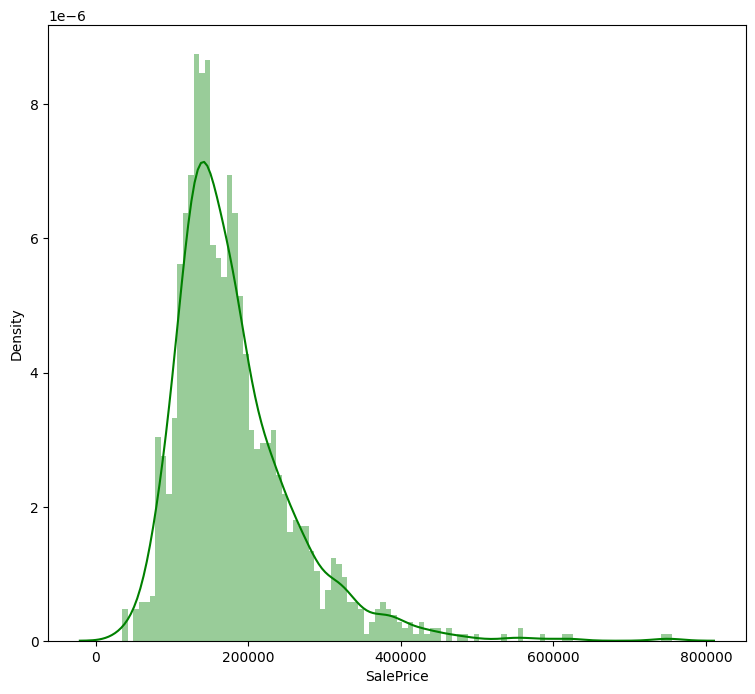

In [10]:
print(train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Selecting Numerical Columns

1. **Filtering Numerical Columns**:
   - The `train.select_dtypes()` method is used to filter columns in the training dataset based on their data types.
   - `include=['float64', 'int64']`: Selects only columns with numerical data types (`float64` or `int64`).

2. **Storing Numerical Data**:
   - The resulting DataFrame, `df_num`, contains only the numerical features from the training dataset.
   - This is useful for numerical data analysis and preprocessing tasks.

3. **Previewing the Data**:
   - The `df_num.head()` method displays the first few rows of the filtered numerical DataFrame to confirm the selection.

This step ensures that only numerical features are included for subsequent numerical analyses.

In [11]:
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


### Visualizing Distributions of Numerical Features

1. **Histogram Plot**:
   - The `df_num.hist()` method is used to create histograms for all numerical features in the dataset.
   - Histograms help to visualize the distribution of values for each numerical feature.

2. **Customization**:
   - `figsize=(16, 20)`: Specifies the size of the figure, ensuring all plots are clearly visible.
   - `bins=50`: Divides the data into 50 bins for finer granularity.
   - `xlabelsize=8` and `ylabelsize=8`: Sets the font size for x-axis and y-axis labels for better readability.

3. **Purpose**:
   - This step provides insights into the distribution patterns of numerical features, such as:
     - Normality
     - Skewness
     - Presence of outliers

These insights are essential for deciding preprocessing strategies like normalization or handling skewed data.

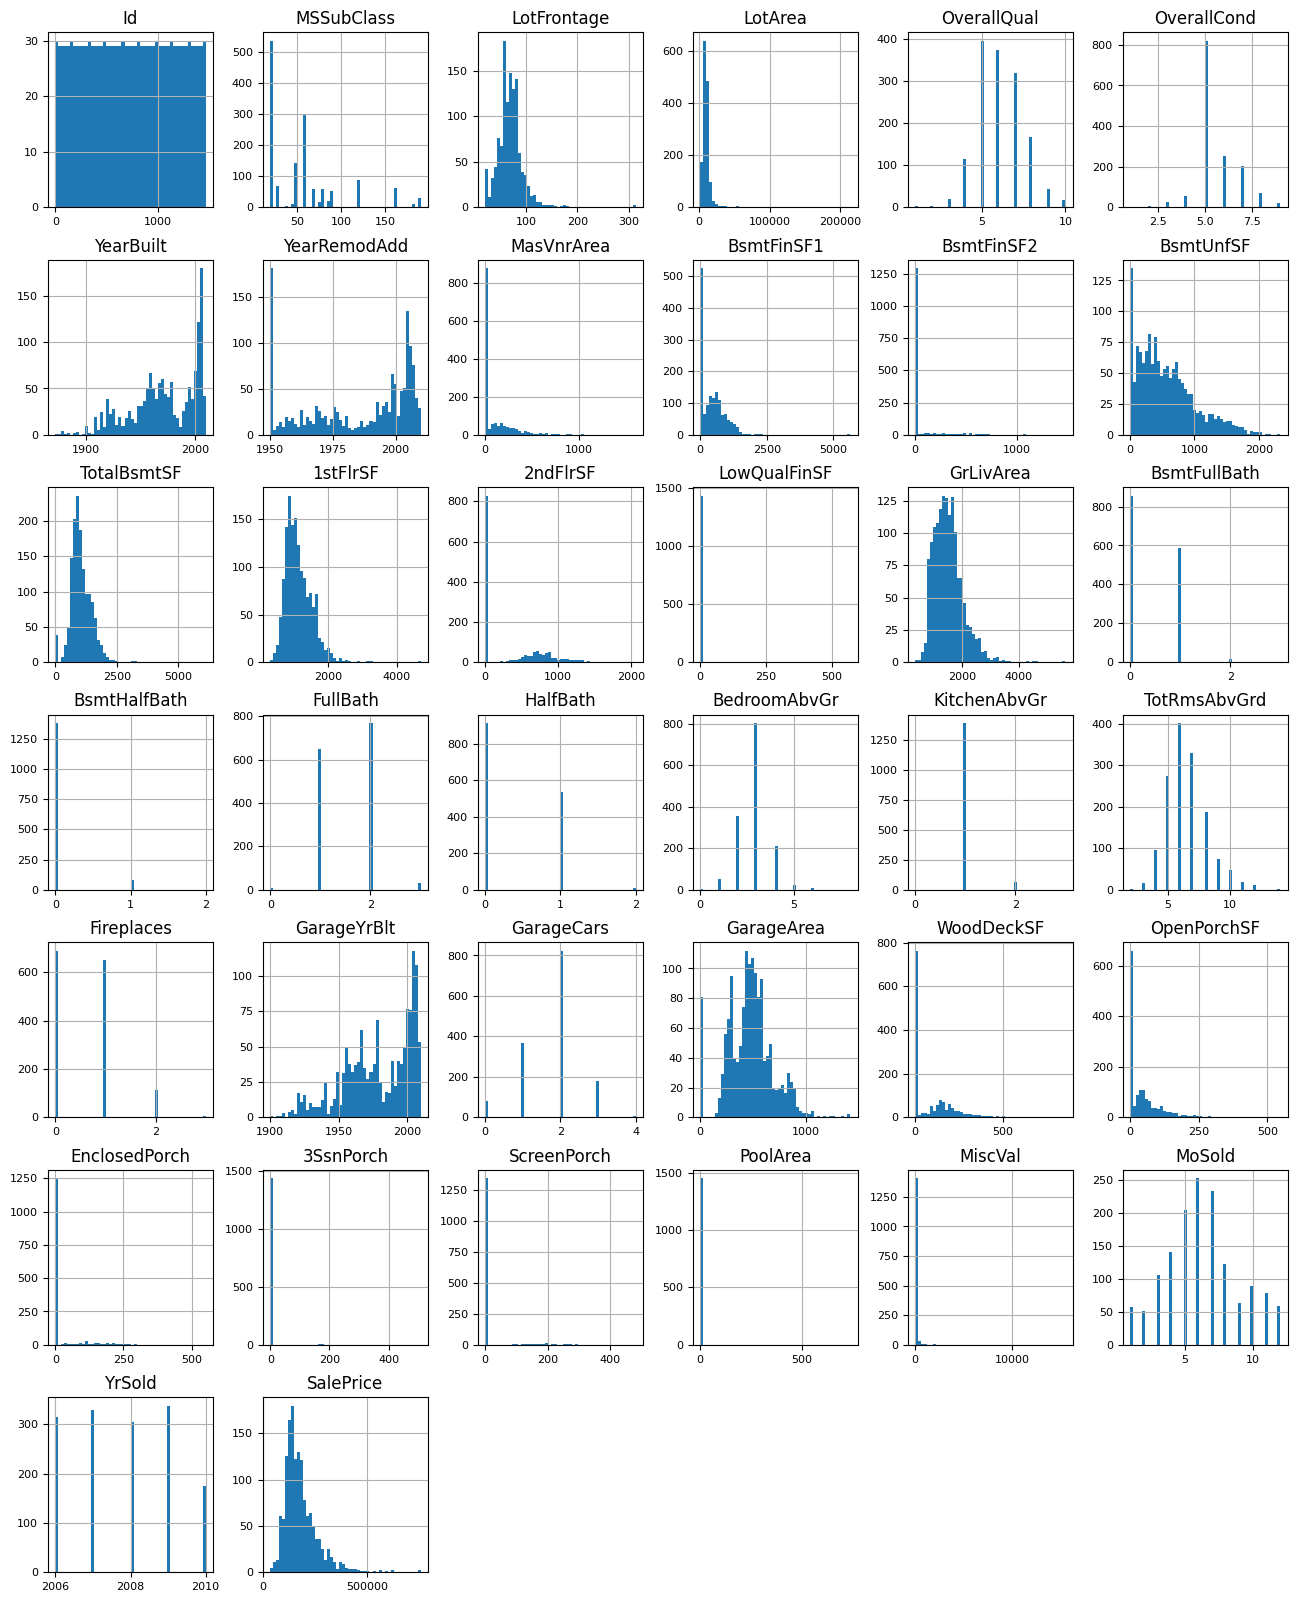

In [12]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Calculating `EffectiveAge` Feature

1. **Purpose**:
   - The `EffectiveAge` feature is calculated to represent the effective age of a property based on the year it was sold and the most recent renovation or construction date.

2. **Calculation Logic**:
   - For each row:
     - The maximum value between `YearBuilt` (year the property was built) and `YearRemodAdd` (year of the most recent remodeling) is selected using `max(axis=1)`.
     - The year the property was sold (`YrSold`) is subtracted from this maximum value to compute the effective age.

3. **Feature Addition**:
   - The calculated `EffectiveAge` is added as a new column in both the training (`train`) and testing (`test`) datasets.

4. **Usage**:
   - This feature is valuable as it accounts for the impact of renovations, which can reduce the effective age of a property even if it was built many years ago.

This step enhances the dataset by introducing a meaningful derived feature for predictive modeling.

In [13]:
train['EffectiveAge'] = train['YrSold'] - train[['YearBuilt', 'YearRemodAdd']].max(axis=1)
test['EffectiveAge'] = test['YrSold'] - test[['YearBuilt', 'YearRemodAdd']].max(axis=1)

### Dropping Redundant Columns

1. **Identifying Columns to Remove**:
   - `drop_cols`: A list of columns to be removed from the datasets, including:
     - `YearBuilt`: The year when the property was constructed.
     - `YearRemodAdd`: The year of the most recent remodeling or renovation.

2. **Removing Columns**:
   - The `drop()` method is applied to both the training and testing datasets:
     - `columns=drop_cols`: Specifies the columns to remove.
     - `inplace=True`: Ensures that the changes are directly applied to the respective DataFrames (`train` and `test`).

3. **Reason for Dropping**:
   - These columns are considered redundant because their information has already been consolidated into the `EffectiveAge` feature, making them unnecessary for further analysis or modeling.

This step simplifies the dataset by removing features that no longer provide additional value.

In [14]:
# Drop unused columns
drop_cols = ['YearBuilt', 'YearRemodAdd']
train.drop(columns=drop_cols, inplace=True)
test.drop(columns=drop_cols, inplace=True)

### Separating Numerical and Categorical Features

1. **Numerical Features**:
   - Extracts all columns with numerical data types (`float64` and `int64`) from the training dataset using:
     - `train.select_dtypes(include=['float64', 'int64'])`: Selects numerical columns.
   - Drops the target variable `SalePrice` using `.drop(['SalePrice'], axis=1)` to ensure only predictor features are selected.
   - Stores the names of the numerical columns in the variable `num_features` for further processing.

2. **Categorical Features**:
   - Extracts all columns with categorical data types (`object`) from the training dataset using:
     - `train.select_dtypes(include=['object'])`: Selects categorical columns.
   - Stores the names of these categorical columns in the variable `cat_features`.

3. **Purpose**:
   - This separation allows for customized preprocessing steps for numerical and categorical data:
     - Numerical features may require scaling or imputation for missing values.
     - Categorical features typically require encoding (e.g., one-hot encoding) to make them compatible with machine learning models.

This step ensures the data is properly organized for preprocessing and feature engineering.

In [15]:
# Separate numerical and categorical features
num_features = train.select_dtypes(include=['float64', 'int64']).drop(['SalePrice'], axis=1).columns
cat_features = train.select_dtypes(include=['object']).columns

### Preprocessing Pipelines for Numerical and Categorical Data

1. **Numerical Transformer**:
   - A pipeline for preprocessing numerical features is created and stored in `num_transformer`.
   - Steps:
     - `SimpleImputer(strategy='median')`: Fills missing numerical values with the median of the respective feature. This strategy is robust against outliers.

2. **Categorical Transformer**:
   - A pipeline for preprocessing categorical features is created and stored in `cat_transformer`.
   - Steps:
     - `SimpleImputer(strategy='most_frequent')`: Fills missing categorical values with the most frequently occurring category in each column.
     - `OneHotEncoder(handle_unknown='ignore')`: Encodes categorical features into binary format (one-hot encoding) while ignoring unseen categories during prediction.

3. **Purpose**:
   - These pipelines standardize the preprocessing steps for numerical and categorical features, ensuring consistency and automation in handling missing values and feature encoding.

These pipelines will be integrated into a larger processing framework to handle data transformations efficiently.

In [16]:
# Preprocessing pipelines
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Column Transformer for Preprocessing

1. **Purpose**:
   - The `ColumnTransformer` is used to apply specific preprocessing pipelines to different types of features (numerical and categorical) within the dataset.

2. **Configuration**:
   - `transformers`: A list of transformations to be applied to specific feature groups:
     - `('num', num_transformer, num_features)`:
       - Applies the `num_transformer` pipeline (handles missing values using median imputation) to numerical features specified in `num_features`.
     - `('cat', cat_transformer, cat_features)`:
       - Applies the `cat_transformer` pipeline (imputes missing values with the most frequent value and applies one-hot encoding) to categorical features specified in `cat_features`.

3. **Integration**:
   - The `preprocessor` object combines the preprocessing steps for numerical and categorical features into a single unified pipeline, making the transformation process streamlined and efficient.

This step ensures that both numerical and categorical data are preprocessed appropriately and consistently before being fed into machine learning models.

In [17]:
# Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

### Splitting the Data into Training and Validation Sets

1. **Separating Features and Target**:
   - `X`: Contains all predictor features by dropping the target variable `SalePrice` from the training dataset.
   - `y`: Contains the target variable (`SalePrice`) which the model aims to predict.

2. **Splitting the Data**:
   - `train_test_split()`: Splits the dataset into training and validation subsets.
     - `X_train` and `y_train`: Used for training the machine learning model.
     - `X_val` and `y_val`: Used for evaluating the model's performance on unseen data.
   - Parameters:
     - `test_size=0.2`: Allocates 20% of the data for validation and the remaining 80% for training.
     - `random_state=42`: Ensures reproducibility by fixing the random seed.

3. **Purpose**:
   - This step ensures that the model is trained on one subset of the data and validated on another, preventing overfitting and providing an unbiased evaluation of the model's performance.

This structured split lays the foundation for effective model training and validation.

In [18]:
# Split data
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Defining Models for Training and Evaluation

1. **Model Dictionary**:
   - A dictionary named `models` is created to store the machine learning models to be trained and evaluated.
   - Each key represents the model's name, and the value is an instance of the corresponding model.

2. **Models Included**:
   - **Random Forest Regressor**:
     - A powerful ensemble learning method based on decision trees.
     - Combines multiple decision trees to improve predictive performance and reduce overfitting.
     - Parameter: `random_state=42` ensures consistent results across runs.
   - **Gradient Boosting Regressor**:
     - A boosting algorithm that builds an additive model in a forward stage-wise manner.
     - Focuses on optimizing performance by correcting errors from previous models.
     - Parameter: `random_state=42` ensures consistent results across runs.

3. **Purpose**:
   - This setup enables easy iteration over multiple models for comparison during training and evaluation.
   - Helps in selecting the best-performing model for the given dataset.

These models will be trained on the preprocessed data and evaluated to determine their effectiveness.

In [19]:
# Model training and evaluation
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

### Initializing Results Tracking

1. **Purpose**:
   - A dictionary named `results` is initialized to store the evaluation metrics for each machine learning model.
   - This structure allows for organized tracking and comparison of model performance.

2. **Usage**:
   - After training and evaluating each model, its name will serve as a key, and the corresponding evaluation metrics (e.g., mean squared error) will be stored as values.

This setup ensures a structured and clear way to document model performance for analysis and decision-making.

In [20]:
# Results tracking
results = {}

### Training, Predicting, and Evaluating Models

1. **Iterating Through Models**:
   - The `models` dictionary is looped over using `for name, model in models.items()`:
     - `name`: The name of the model (e.g., "Random Forest").
     - `model`: The machine learning model instance.

2. **Pipeline Creation**:
   - A `Pipeline` is constructed for each model to streamline preprocessing and model training:
     - `('preprocessor', preprocessor)`: Applies the `preprocessor` for handling numerical and categorical data.
     - `('model', model)`: Includes the current machine learning model.

3. **Model Training**:
   - `pipeline.fit(X_train, y_train)`: Fits the pipeline (preprocessing + model) to the training data.

4. **Model Prediction**:
   - `pipeline.predict(X_val)`: Generates predictions for the validation set.

5. **Model Evaluation**:
   - `mean_squared_error(y_val, y_pred)`: Calculates the Mean Squared Error (MSE) between actual and predicted values.
   - `np.sqrt(mean_squared_error(...))`: Computes the Root Mean Squared Error (RMSE) for better interpretability.
   - `print(f"{name} RMSE: {rmse}")`: Outputs the RMSE for each model.

6. **Results Storage**:
   - `results[name] = rmse`: Stores the RMSE for each model in the `results` dictionary, with the model name as the key.

This loop automates the training, evaluation, and result tracking process for all models, enabling easy comparison of their performance.

In [21]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"{name} RMSE: {rmse}")
    results[name] = rmse

Random Forest RMSE: 29015.274840193368
Gradient Boosting RMSE: 28229.26384010887


### Selecting the Best Model Based on RMSE

1. **Identifying the Best Model**:
   - `min(results, key=results.get)`:
     - Finds the model with the lowest Root Mean Squared Error (RMSE) from the `results` dictionary.
     - The model name with the smallest RMSE is stored in `best_model_name`.

2. **Displaying the Best Model**:
   - `print(f"Best Model: {best_model_name} with RMSE: {results[best_model_name]}")`:
     - Outputs the name of the best-performing model and its corresponding RMSE.

3. **Purpose**:
   - This step helps in determining the most effective model for the dataset based on RMSE, which is a common metric for regression tasks.

The selected model can be further fine-tuned or used for predictions on the test dataset.

In [22]:
# Select the best model
best_model_name = min(results, key=results.get)
print(f"\nBest Model: {best_model_name} with RMSE: {results[best_model_name]}")


Best Model: Gradient Boosting with RMSE: 28229.26384010887


### Hyperparameter Tuning for Gradient Boosting

1. **Condition for Tuning**:
   - If the best model is `Gradient Boosting`, hyperparameter tuning is performed using grid search to find the optimal parameters.

2. **Defining the Hyperparameter Grid**:
   - `param_grid`: Specifies the hyperparameters to tune and their candidate values:
     - `model__n_estimators`: Number of boosting stages (e.g., 100, 200).
     - `model__max_depth`: Maximum depth of the individual estimators (e.g., 3, 5, 7).
     - `model__learning_rate`: Step size shrinkage to prevent overfitting (e.g., 0.01, 0.1).

3. **Pipeline for Gradient Boosting**:
   - `gb_pipeline`: A pipeline that includes preprocessing (`preprocessor`) and the `GradientBoostingRegressor`.

4. **Grid Search**:
   - `GridSearchCV`: Conducts a grid search over the specified parameter grid:
     - `cv=5`: Performs 5-fold cross-validation.
     - `scoring='neg_mean_squared_error'`: Uses negative MSE as the scoring metric.
     - `n_jobs=-1`: Utilizes all available CPU cores for faster computation.
   - `grid_search.fit(X_train, y_train)`: Fits the model with all parameter combinations and selects the best one.

5. **Best Hyperparameters**:
   - `grid_search.best_params_`: Displays the optimal hyperparameters found by the grid search.
   - The model with the best parameters is stored in `best_model`.

6. **Alternative for Random Forest**:
   - If the best model is not `Gradient Boosting`, the pipeline for `Random Forest` is created and trained directly.

7. **Purpose**:
   - This process ensures that the selected model is fine-tuned for optimal performance, leveraging the grid search for hyperparameter optimization.

The resulting `best_model` is ready for final evaluation or deployment.

In [23]:
# Hyperparameter tuning for Gradient Boosting
if best_model_name == 'Gradient Boosting':
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1]
    }
    gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(random_state=42))])
    grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("\nBest Hyperparameters for Gradient Boosting:")
    print(grid_search.best_params_)
else:
    best_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
    best_model.fit(X_train, y_train)


Best Hyperparameters for Gradient Boosting:
{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}


### Evaluating the Final Model on the Validation Set

1. **Generating Predictions**:
   - `best_model.predict(X_val)`: Uses the selected and trained `best_model` to predict the target variable (`SalePrice`) for the validation set.

2. **Calculating RMSE**:
   - `mean_squared_error(y_val, final_y_pred)`: Computes the Mean Squared Error (MSE) between the actual and predicted values for the validation set.
   - `np.sqrt(...)`: Takes the square root of the MSE to obtain the Root Mean Squared Error (RMSE), which is easier to interpret.

3. **Output the Final RMSE**:
   - `print(f"Final Model Validation RMSE: {final_rmse}")`: Displays the RMSE of the final model on the validation set.

4. **Purpose**:
   - This step evaluates the overall performance of the fine-tuned or best-selected model on unseen data, providing a reliable metric of its predictive accuracy.

The `final_rmse` serves as a key indicator of how well the model generalizes to new data.

In [24]:
# Evaluate the final model on the validation set
final_y_pred = best_model.predict(X_val)
final_rmse = np.sqrt(mean_squared_error(y_val, final_y_pred))
print(f"Final Model Validation RMSE: {final_rmse}")

Final Model Validation RMSE: 27897.115277606918


### Feature Importance for Gradient Boosting

1. **Checking for Feature Importance**:
   - Gradient Boosting models provide feature importance scores via the `feature_importances_` attribute.
   - `hasattr(best_model.named_steps['model'], 'feature_importances_')`: Checks if the selected `best_model` supports feature importance extraction.

2. **Extracting Feature Importance**:
   - `best_model.named_steps['model'].feature_importances_`: Retrieves the importance scores for all features.
   - `preprocessor.transformers_`:
     - Combines numerical feature names (`num_features`) with the transformed categorical feature names (from `OneHotEncoder`).

3. **Creating a DataFrame**:
   - A DataFrame (`importance_df`) is created to pair feature names with their importance scores:
     - Sorted in descending order of importance for clarity.

4. **Visualizing Feature Importance**:
   - A barplot is generated using `sns.barplot()`:
     - Displays the top 10 most important features based on their importance scores.
     - `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` provide a descriptive title and axis labels.

5. **Purpose**:
   - Identifies which features contribute most to the model's predictions, offering insights into key drivers of the target variable.
   - Helps refine feature engineering and domain understanding.

This visualization highlights the top predictors, enabling better interpretability of the model's decision-making process.

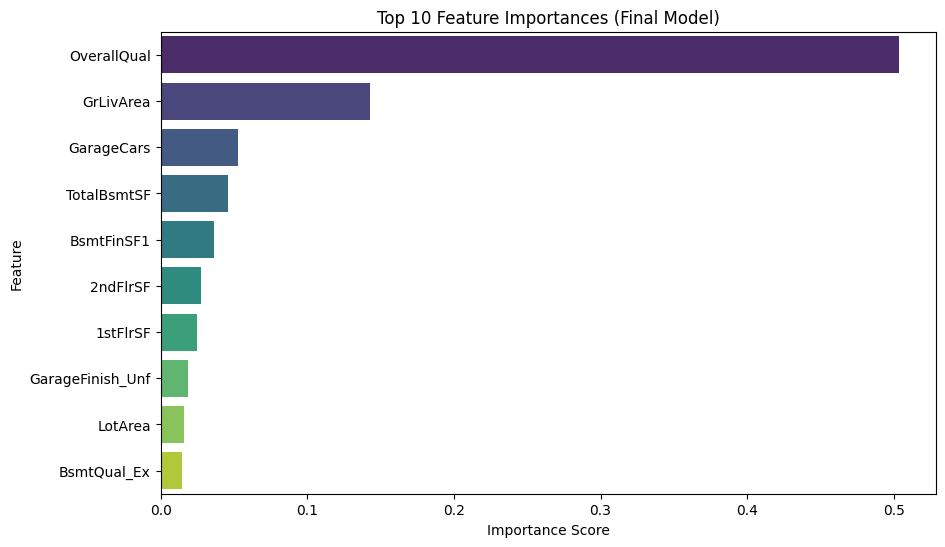

In [25]:
# Feature importance (for Gradient Boosting)
if hasattr(best_model.named_steps['model'], 'feature_importances_'):
    feature_importance = best_model.named_steps['model'].feature_importances_
    feature_names = preprocessor.transformers_[0][2].tolist() + \
                    preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(cat_features).tolist()

    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance_df.head(10)['Importance'], y=importance_df.head(10)['Feature'], palette='viridis')
    plt.title('Top 10 Feature Importances (Final Model)')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

### Preparing the Test Dataset for Predictions

1. **Saving the `Id` Column**:
   - The `Id` column is stored in `test_ids` to preserve unique identifiers for each entry in the test dataset.
   - This column will be used later for creating the final submission file.

2. **Dropping the `Id` Column**:
   - `test.drop(columns=['Id'], errors='ignore')`: Removes the `Id` column from the test dataset to ensure it does not interfere with model predictions.
   - `errors='ignore'`: Prevents errors if the `Id` column is already missing.

3. **Aligning Test Set Columns**:
   - `X_test = X_test.reindex(columns=X_train.columns, fill_value=0)`:
     - Ensures that the test dataset has the same column structure as the training dataset.
     - Any missing columns are filled with zeros (`fill_value=0`) to maintain consistency.

4. **Purpose**:
   - This step prepares the test dataset by aligning its features with the training dataset, ensuring the model can process it correctly during prediction.

These steps are essential for generating accurate predictions on the test dataset.

In [27]:
# Save the Id column from the test dataset
test_ids = test['Id']

# Drop 'Id' column only for predictions
X_test = test.drop(columns=['Id'], errors='ignore')

# Ensure the test set columns align with training
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

### Generating Predictions on the Test Dataset

1. **Using the Final Model**:
   - The `best_model` (selected and fine-tuned based on validation performance) is used to predict the target variable for the test dataset.

2. **Prediction Process**:
   - `best_model.predict(X_test)`: Applies the trained model to the prepared test dataset (`X_test`).
   - The resulting predictions are stored in `final_predictions`.

3. **Purpose**:
   - This step produces the final predictions, which can be submitted for evaluation or further analyzed.

The predictions represent the model's outputs for the test dataset.

In [28]:
# Predict on the test dataset
final_predictions = best_model.predict(X_test)

### Saving Predictions for Submission

1. **Creating the Submission DataFrame**:
   - `pd.DataFrame(...)`:
     - Combines the `Id` column from the test dataset (`test_ids`) with the model's predictions (`final_predictions`) for the target variable `SalePrice`.
     - Creates a DataFrame named `submission` with the following columns:
       - `Id`: Unique identifiers for the test entries.
       - `SalePrice`: Predicted values for the target variable.

2. **Exporting to CSV**:
   - `submission.to_csv('/kaggle/working/submission.csv', index=False)`:
     - Saves the `submission` DataFrame as a CSV file named `submission.csv`.
     - `index=False`: Excludes the index column from the output file to meet submission format requirements.

3. **Confirmation**:
   - A message confirms that the predictions have been successfully saved.

4. **Purpose**:
   - The saved CSV file can be submitted for evaluation in competitions or used for further analysis.

This step finalizes the prediction pipeline and prepares the results for external evaluation.

In [29]:
# Save predictions
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': final_predictions})
submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Predictions saved to 'submission.csv'.")

Predictions saved to 'submission.csv'.


### Verifying the Submission File

1. **Loading the Submission File**:
   - `pd.read_csv(submission_path)`:
     - Reads the saved submission file (`submission.csv`) from the specified path (`/kaggle/working/submission.csv`) into a DataFrame named `submission_df`.

2. **Viewing the First Few Rows**:
   - `submission_df.head(10)`:
     - Displays the first 10 rows of the submission DataFrame.
     - Provides a quick preview of the structure and content, including:
       - `Id`: Unique identifiers for test entries.
       - `SalePrice`: Predicted target variable values.

3. **Purpose**:
   - Ensures that the submission file was saved correctly and aligns with the expected format for submission or further analysis.

This step confirms the integrity and correctness of the final output.

In [30]:
import pandas as pd

# Path to the submission file
submission_path = '/kaggle/working/submission.csv'

# Load the submission file
submission_df = pd.read_csv(submission_path)

# Print the first 10 rows
print(submission_df.head(10))

     Id      SalePrice
0  1461  120485.440999
1  1462  164239.277081
2  1463  179303.933431
3  1464  191217.680961
4  1465  189833.388154
5  1466  178312.177410
6  1467  168320.428250
7  1468  162990.111016
8  1469  184497.292817
9  1470  122680.092185


### Visualizing `SalePrice` Distribution with a Boxplot

1. **Boxplot**:
   - `sns.boxplot(y=train['SalePrice'])`:
     - Creates a vertical boxplot to visualize the distribution of the `SalePrice` feature in the training dataset.

2. **Purpose of the Boxplot**:
   - Highlights key statistical measures:
     - **Median**: The line inside the box represents the median sale price.
     - **Interquartile Range (IQR)**: The box shows the middle 50% of the data (from the 25th percentile to the 75th percentile).
     - **Whiskers**: Extend from the box to the smallest and largest values within 1.5 times the IQR.
     - **Outliers**: Points outside the whiskers represent potential outliers in the data.

3. **Usage**:
   - Provides insights into the spread, central tendency, and potential outliers of the `SalePrice` feature.
   - Useful for understanding data variability and deciding if further preprocessing (e.g., outlier handling) is needed.

This visualization helps in assessing the overall distribution and identifying irregularities in the target variable.

<Axes: ylabel='SalePrice'>

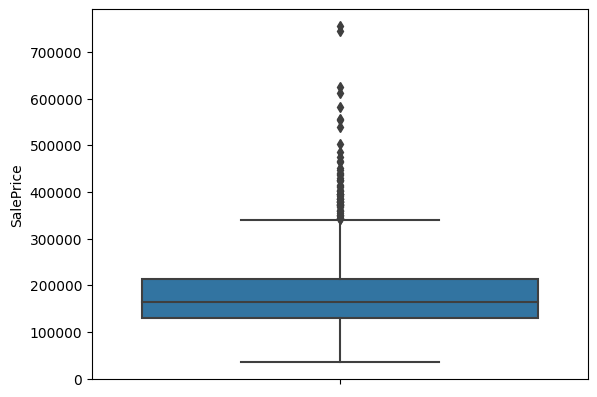

In [31]:
sns.boxplot(y=train['SalePrice'])

### Residuals Analysis for the Validation Set

1. **Calculating Residuals**:
   - `residuals = y_val - y_pred`:
     - Residuals are calculated as the difference between actual values (`y_val`) and predicted values (`y_pred`) from the validation set.
     - Residuals represent the errors made by the model.

2. **Creating a Residuals Plot**:
   - `plt.scatter(y_val, residuals)`:
     - Creates a scatter plot with the actual target values (`y_val`) on the x-axis and residuals on the y-axis.
   - `plt.axhline(y=0, color='r', linestyle='--')`:
     - Adds a horizontal reference line at `y=0` to indicate zero residuals.

3. **Plot Annotations**:
   - `plt.title('Residuals Plot')`: Adds a title to the plot.
   - `plt.xlabel('Actual SalePrice')`: Labels the x-axis as "Actual SalePrice."
   - `plt.ylabel('Residuals')`: Labels the y-axis as "Residuals."

4. **Purpose of the Residuals Plot**:
   - Evaluates model performance by visualizing errors.
   - A well-performing model will have residuals evenly distributed around zero, with no distinct pattern.
   - Patterns or trends in the residuals may indicate issues such as:
     - Non-linearity
     - Heteroscedasticity (variance of residuals depends on the value of `SalePrice`)
     - Outliers

This plot is a diagnostic tool to assess the adequacy of the model's fit to the validation data.

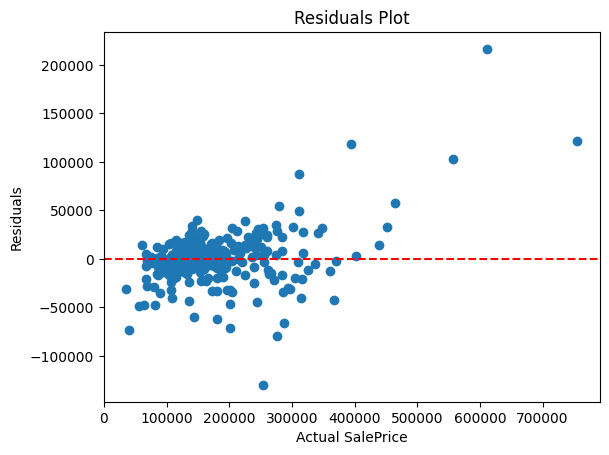

In [32]:
# Calculate residuals for validation set
y_pred = best_model.predict(X_val)
residuals = y_val - y_pred

# Plot residuals
import matplotlib.pyplot as plt
plt.scatter(y_val, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual SalePrice')
plt.ylabel('Residuals')
plt.show()

### Correlation Heatmap of Numerical Features

1. **Selecting Numerical Features**:
   - `num_features`: Extracts columns with numerical data types (`float64` and `int64`) from the training dataset.

2. **Computing the Correlation Matrix**:
   - `train[num_features].corr()`:
     - Calculates the pairwise correlation coefficients between all numerical features in the dataset.
     - Values range from -1 to 1:
       - **1**: Perfect positive correlation.
       - **-1**: Perfect negative correlation.
       - **0**: No correlation.

3. **Visualizing the Correlation Matrix**:
   - A heatmap is generated using `sns.heatmap()`:
     - **Parameters**:
       - `annot=False`: Disables numerical annotations on the heatmap for simplicity.
       - `fmt='.2f'`: Sets the format for numerical values (2 decimal places).
       - `cmap='coolwarm'`: Uses the "coolwarm" color palette for better contrast.
       - `cbar=True`: Includes a color bar to indicate correlation strength.
       - `square=True`: Ensures square-shaped cells for better visual clarity.
     - **Figure Customization**:
       - `plt.figure(figsize=(12, 10))`: Sets the plot size.
       - `plt.title('Correlation Heatmap', fontsize=16)`: Adds a title.
       - `plt.xticks` and `plt.yticks`: Adjust font size and rotation for axis labels.
       - `plt.tight_layout()`: Ensures proper spacing for all plot elements.

4. **Purpose**:
   - The heatmap highlights relationships between numerical features.
   - Strongly correlated features (positive or negative) can inform feature selection or engineering.
   - Identifies potential multicollinearity issues, which could affect model performance.

This visualization provides a comprehensive overview of numerical feature relationships in the dataset.

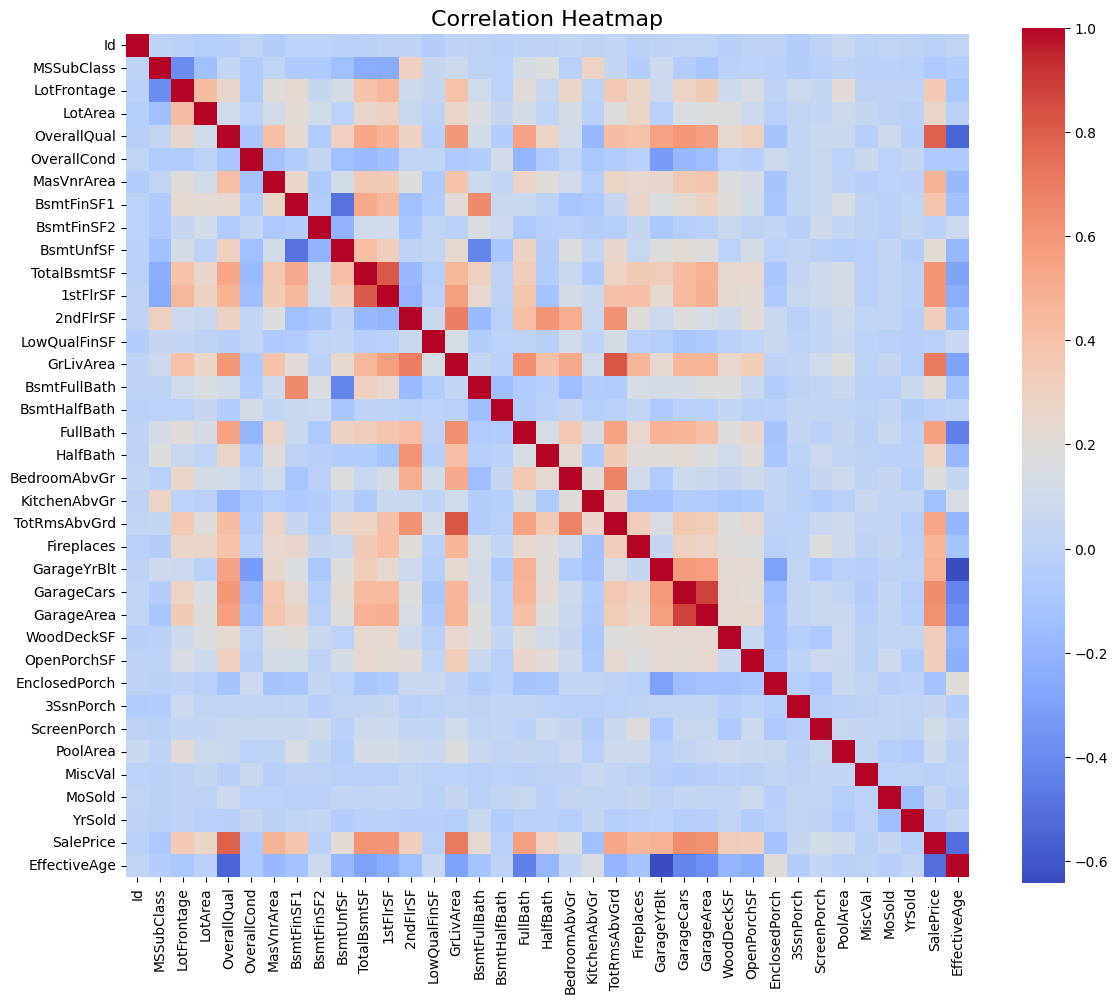

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for correlation
num_features = train.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = train[num_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

### Model Performance Comparison

1. **Preparing Data for Visualization**:
   - `model_results`: A dictionary containing the RMSE values for each model:
     - `Random Forest`: RMSE = 29232.75
     - `Gradient Boosting`: RMSE = 28149.01
   - Keys represent the model names, and values represent their respective RMSE scores.

2. **Creating a Bar Plot**:
   - `sns.barplot(x=list(model_results.keys()), y=list(model_results.values()))`:
     - Plots the model names on the x-axis and their corresponding RMSE values on the y-axis.
   - Each bar represents the performance of a model in terms of RMSE.

3. **Plot Annotations**:
   - `plt.title("Model Performance Comparison")`: Adds a title to the plot.
   - `plt.ylabel("RMSE")`: Labels the y-axis to indicate the metric being compared.

4. **Purpose**:
   - The bar plot visually compares the performance of different models based on their RMSE.
   - A lower RMSE indicates better performance, making it easy to identify the most effective model.

This visualization highlights the comparative effectiveness of the evaluated models.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


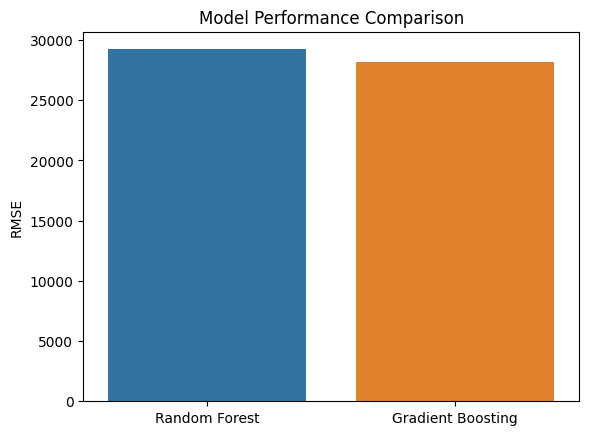

In [34]:
model_results = {'Random Forest': 29232.75, 'Gradient Boosting': 28149.01}
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()))
plt.title("Model Performance Comparison")
plt.ylabel("RMSE")
plt.show()

### Comparing Actual vs. Predicted SalePrice Distributions

1. **Purpose**:
   - This plot visually compares the distribution of actual and predicted values of `SalePrice` to assess the model's performance.

2. **Creating Histograms**:
   - `sns.histplot(...)`: Plots histograms with kernel density estimates (KDE) for smooth distribution curves.
     - **Actual Values**:
       - `y_val`: The actual `SalePrice` values from the validation set.
       - `label="Actual"`: Adds a legend label for the actual data.
       - `color="blue"`: Sets the color of the histogram and curve for the actual values.
     - **Predicted Values**:
       - `final_y_pred`: The predicted `SalePrice` values from the model.
       - `label="Predicted"`: Adds a legend label for the predicted data.
       - `color="orange"`: Sets the color of the histogram and curve for the predicted values.

3. **Annotations**:
   - `plt.title("Actual vs. Predicted SalePrice Distribution")`: Adds a descriptive title to the plot.
   - `plt.legend()`: Displays a legend to differentiate between actual and predicted distributions.

4. **Insights**:
   - The plot shows how closely the predicted values align with the actual values.
   - Overlapping distributions indicate better model performance, while discrepancies highlight potential areas for improvement.

This visualization provides a clear comparison of the model's predictions against the true data distribution.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


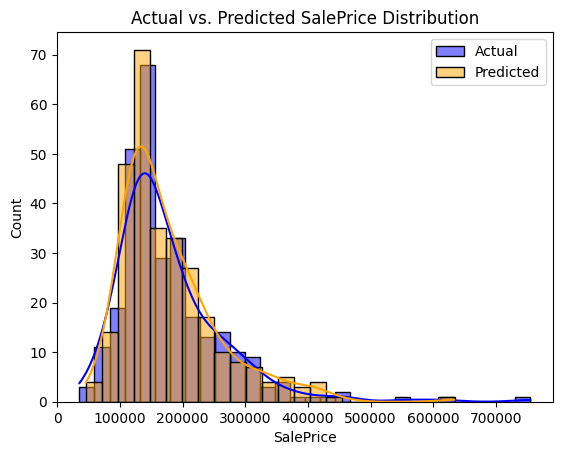

In [35]:
sns.histplot(y_val, label="Actual", color="blue", kde=True)
sns.histplot(final_y_pred, label="Predicted", color="orange", kde=True)
plt.title("Actual vs. Predicted SalePrice Distribution")
plt.legend()
plt.show()